** 회귀모형 2 **
- 카테고리 변수 encoding을 위한 fomula 활용, 회귀모형 1과 동일한 변수 조건
- 제외변수: Id(의미X), Model(정합성X), Cilynders(variance=0),
- 카테고리: Fuel_Type, Color
- train 데이터 모두 사용

In [33]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
from patsy import dmatrix

In [32]:
train_df = pd.read_csv('/Users/yoo/Desktop/dss/regression/dss-regression-datasets-master/project-toyotacorolla-data/train.csv')
test_df = pd.read_csv('/Users/yoo/Desktop/dss/regression/dss-regression-datasets-master/project-toyotacorolla-data/test.csv')

In [39]:
xtrain_df

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Automatic,CC,...,col_dummy4,col_dummy5,col_dummy6,col_dummy7,col_dummy8,col_dummy9,col_dummy10,fuel_dumm1,fuel_dumm2,fuel_dumm3
0,13500,23,10,2002,46986,Diesel,90,1,0,2000,...,0,0,0,0,0,0,0,0,1,0
1,13750,23,10,2002,72937,Diesel,90,1,0,2000,...,0,0,0,0,0,0,0,0,1,0
2,13750,30,3,2002,38500,Diesel,90,0,0,2000,...,0,0,0,0,0,0,0,0,1,0
3,20950,25,8,2002,31461,Petrol,192,0,0,1800,...,0,0,0,0,0,0,0,0,0,1
4,19600,25,8,2002,32189,Petrol,192,0,0,1800,...,1,0,0,0,0,0,0,0,0,1
5,21500,31,2,2002,23000,Petrol,192,1,0,1800,...,0,0,0,0,0,0,0,0,0,1
6,22000,28,5,2002,18739,Petrol,192,0,0,1800,...,0,1,0,0,0,0,0,0,0,1
7,22750,30,3,2002,34000,Petrol,192,1,0,1800,...,0,1,0,0,0,0,0,0,0,1
8,17950,24,9,2002,21716,Petrol,110,1,0,1600,...,0,0,0,0,0,0,0,0,0,1
9,16950,30,3,2002,64359,Petrol,110,1,0,1600,...,0,1,0,0,0,0,0,0,0,1


In [37]:
del train_df['Id']
#del train_df['Color']
del train_df['Model']
# del train_df['Fuel_Type']
del train_df['Fuel_Type.1']
del train_df['Cylinders']

In [40]:
y_train_df = train_df['Price']

In [41]:
del train_df['Price']

In [42]:
x_train_df = train_df

In [43]:
# 엑셀 단에서 인코딩된 dummy 변수 제외
del x_train_df['col_dummy1']
del x_train_df['col_dummy2']
del x_train_df['col_dummy3']
del x_train_df['col_dummy4']
del x_train_df['col_dummy5']
del x_train_df['col_dummy6']
del x_train_df['col_dummy7']
del x_train_df['col_dummy8']
del x_train_df['col_dummy9']
del x_train_df['col_dummy10']
del x_train_df['fuel_dumm1']
del x_train_df['fuel_dumm2']
del x_train_df['fuel_dumm3']


In [45]:
x_train_df.head()

,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Automatic,CC,Doors,...,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar,Color
0,23,10,2002,46986,Diesel,90,1,0,2000,3,...,1,0,0,0,1,0,0,0,0,Blue
1,23,10,2002,72937,Diesel,90,1,0,2000,3,...,1,0,0,0,1,0,0,0,0,Silver
2,30,3,2002,38500,Diesel,90,0,0,2000,3,...,1,0,1,0,1,0,0,0,0,Black
3,25,8,2002,31461,Petrol,192,0,0,1800,3,...,1,0,0,0,0,1,0,0,0,Silver
4,25,8,2002,32189,Petrol,192,0,0,1800,3,...,1,0,1,1,1,1,0,0,0,Red


In [ ]:
for i in x_train_df.columns:
    print(i + ' +', end=' ')

In [63]:
fomula = "y_train_df ~ Age_08_04 + Mfg_Month + Mfg_Year + KM + Fuel_Type + HP + Met_Color + Automatic + CC + Doors + Gears + Quarterly_Tax + Weight + Mfr_Guarantee + BOVAG_Guarantee + Guarantee_Period + ABS + Airbag_1 + Airbag_2 + Airco + Automatic_airco + Boardcomputer + CD_Player + Central_Lock + Powered_Windows + Power_Steering + Radio + Mistlamps + Sport_Model + Backseat_Divider + Metallic_Rim + Radio_cassette + Parking_Assistant + Tow_Bar + Color"

In [66]:
model_2 = sm.OLS.from_formula(fomula, data=x_train_df)

In [67]:
result_model_2 = model_2.fit()
print(result_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:             y_train_df   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     228.9
Date:                Thu, 19 Oct 2017   Prob (F-statistic):               0.00
Time:                        17:50:07   Log-Likelihood:                -8567.8
No. Observations:                1019   AIC:                         1.722e+04
Df Residuals:                     975   BIC:                         1.744e+04
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.0081    

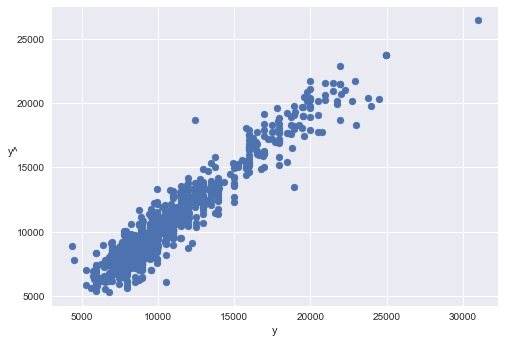

In [68]:
y_train_new = result_model_2.predict(x_train_df)

plt.scatter(y_train_df, y_train_new)
plt.xlabel(u"y")
plt.ylabel(u"y^",rotation=1)
plt.show()

In [71]:
sm.tools.eval_measures.rmse(y_train_df, y_train_new)

1084.7718181200207